## A classic problem

Here I'm going to consider the half-pipe problem seen in Classical Mechanics by Taylor, Example 1.2. It consists of a skateboard in a semicircular half-pipe that is released at some angle $\phi$ from equilibrium position. This problem is analogous to many others in classical mechanics, like the simple pendulum problem, a mass on a spring, etc. For the moment, we'll neglect friction. 

Through a straightforward analysis of the forces, we can arrive at the equation of motion for the angle the skateboard makes with the bottom of the pipe:

\begin{equation} \tag{1}
\ddot{\phi} = -\frac{g}{R}\sin (\phi)
\end{equation}

where $g$ is the gravitational constant, and $R$ is the radius of the pipe. 

This differential equation has no solution in terms of commonly known elementary functions (though complex analysis says otherwise - see 
[this](https://mathworld.wolfram.com/JacobiEllipticFunctions.html) and [this](https://en.wikipedia.org/wiki/Jacobi_elliptic_functions#Jacobi_elliptic_functions_as_solutions_of_nonlinear_ordinary_differential_equations)).
However, using the small angle approximation, we can approximate the sine as $\sin(\phi) \approx \phi$, so that the equation becomes

\begin{equation} \tag{2}
\ddot{\phi} = - \frac{g}{R}\phi
\end{equation}

This has the well-known solution consisting of sines and cosines: $\phi(t) = A\sin(\omega_0 t) + B\cos(\omega_0 t)$, with $A$ and $B$ being constants determined by the boundary conditions of the system, and $\omega^2 = \frac{g}{R}$ being the natural frequency of oscillations. In particular, if we let the release angle be $\phi(0)=\phi_0$ and the initial velocity $\dot{\phi}(0) = 0$, we have the solution 

\begin{align*}
\phi(t) = \phi_0\cos(\omega t)
\end{align*}

(note that, more generally, for a nonzero initial velocity $\omega_0$, $A = \frac{\omega_0}{\omega}$, and $\phi(t) = \phi_0 \cos(\omega t) + \frac{\omega_0}{\omega} \sin(\omega t)$.)

In the following, I will be using numerical integration (Runge Kutta 4) to compare the solution provided by the small angle approximation from Equation 2 to the numerical solution to the nonlinear Equation 1. 

We can define a state vector $\mathbf{q}(t)$ such that

\begin{align*}
\mathbf{q}(t) = 
\begin{bmatrix}
q_1(t) \\
q_2(t)
\end{bmatrix}
= 
\begin{bmatrix}
\phi(t) \\
\dot{\phi}(t)
\end{bmatrix}
\implies
\dot{\mathbf{q}}(t) = 
\begin{bmatrix}
\dot{\phi}(t) \\
\ddot{\phi}(t)
\end{bmatrix}
= 
\begin{bmatrix}
\dot{\phi}(t) \\
-\frac{g}{R}\sin(t)
\end{bmatrix}
\end{align*}

If we define $\mathbf{A}$ and $\mathbf{B}$ as 

\begin{align*}
\mathbf{A} = 
\begin{bmatrix}
0 & 1 \\
0 & 0 
\end{bmatrix}, 

\mathbf{B} = 
\begin{bmatrix}
0 \\
1
\end{bmatrix}
\end{align*}

we find 

\begin{align*}
\dot{\mathbf{q}}(t) = \mathbf{A}\mathbf{q}(t) - \frac{g}{R}\sin(\phi(t)) \mathbf{B}
\end{align*}

This we can integrate using the methods presented [here](https://lpsa.swarthmore.edu/NumInt/NumIntIntro.html) and elsewhere.

In [ ]:
import numpy as np
import sympy as sp
import scipy as sc
import matplotlib.pyplot as plt
import ipywidgets as wd

def smallAngle(A, B, omega, t):
    return A*np.sin(omega*t) + B*np.sin(omega*t)

def rk4(A, B, q, q0, gamma, t, h, params):

    q[:, 0] = q0
    for i in range(len(t)-1):

        k1 = A @ q[:, i] + B*gamma(params[0], q[0,i], t)
        y1 = q[:, i] + k1*h/2

        k2 = A @ y1 + B*gamma(params[0], q[0,i], t)
        y2 = q[:, i] + k2*h/2

        k3 = A @ y2 + B*gamma(params[0], q[0,i], t)
        y3 = q[:, i] + k3*h

        k4 = A @ y3 + B*gamma(params[0], q[0,i], t)
        q[:, i+1] = q[:, i] + (k1 + 2*k2 + 2*k3 + k4)*h/6
    return q

def gammaRamp(p, x, y):
    return -np.sin(x)*p**2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


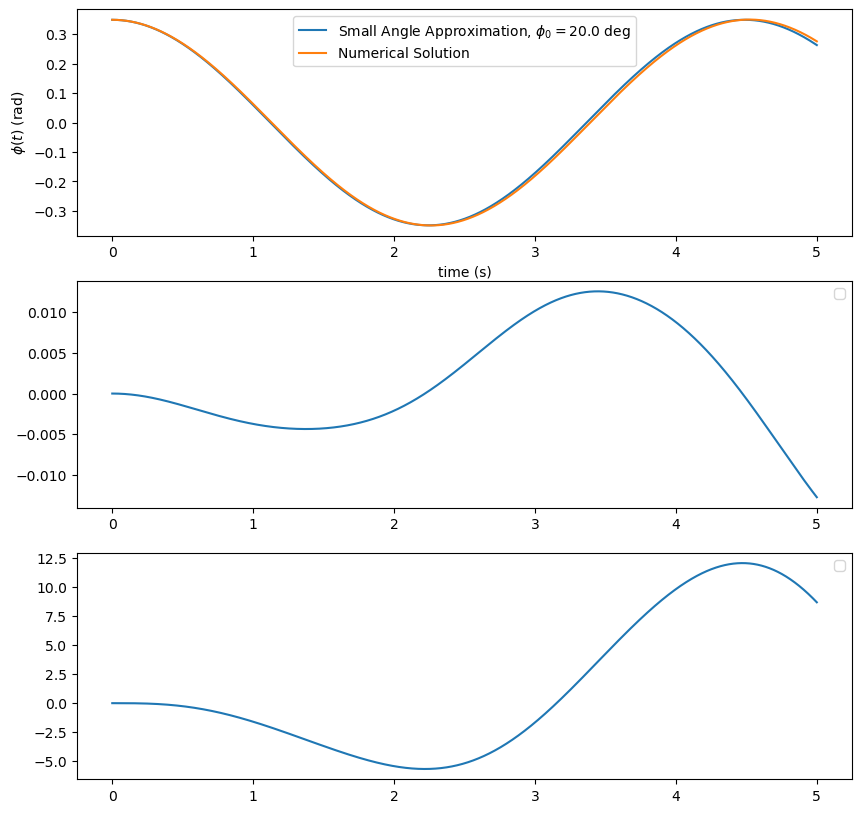

In [43]:
phi0 = 20*np.pi/180 #initial angle, phi
phiDot0 = 0 #initial velocity
g = 9.8 #m/s2, gravity
R = 5 #m, radius of pipe
h = 0.001 #time step
omega = np.sqrt(g/R)

#initial state vector
q0 = np.array([
    phi0, phiDot0
]) 

t = np.arange(0, 5 + h, step=h)

#small angle approximation
phiExact = phi0*np.cos(omega*t)

A = np.array([ 
    [0, 1],
    [0, 0]
]) #coefficient matrix

B = np.array([0, 1]) #input matrix

#below, the first row is q1 (phi), second is q2 (phidot)
qstar = np.zeros((2, len(t))) #preallocate array for our state variables

qstar[:, 0] = q0 #initial conditions

q = rk4(A, B, qstar, q0, gammaRamp, t, h, [omega])

#determine the phase difference
delta = phiExact - q[0, :]
cumDelta = np.cumsum(delta)




fig, ax = plt.subplots(3,1, figsize=(10, 10))
ax[0].plot(t, phiExact, label='Small Angle Approximation, $\\phi_0 = ${} deg'.format(str(phi0*180/np.pi)))
ax[0].plot(t, q[0,:], label='Numerical Solution')

ax[0].set_ylabel('$\\phi(t)$ (rad)')
ax[0].set_xlabel('time (s)')

ax[1].plot(t, delta)

ax[2].plot(t, cumDelta)

for a in ax: 
    a.legend()

plt.show()
fig.tight_layout()